In [212]:
import requests
import json
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
import rasterio as rs
from rasterio.mask import mask
import numpy as np


In [ ]:
Dreveneind 1, 2910 Essen

In [165]:
street_name = input("Enter the street name: ") 

Enter the street name: Dreveneind


In [166]:
house_number = input("Enter the house number: ") 

Enter the house number: 1


In [167]:
post_code = input("Enter the postcode: ") 

Enter the postcode: 2910


In [168]:
def get_coordinates():
    response_API = requests.get('https://api.basisregisters.vlaanderen.be/v1/adresmatch',
                            params= {'straatnaam':street_name ,
                                     'huisnummer':house_number , 
                                     'postcode': post_code} ).json()


    coordinates = response_API['adresMatches'][0]['adresPositie']['point']['coordinates']
    x = coordinates[0]
    y = coordinates[1]

    gebouweenheden = requests.get(response_API['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    gebouw = requests.get(gebouweenheden['gebouw']['detail']).json()
    polygon_list = gebouw['geometriePolygoon']['polygon']['coordinates'][0]
    return coordinates



In [169]:
def get_polygon():
    
    response_API = requests.get('https://api.basisregisters.vlaanderen.be/v1/adresmatch',
                            params= {'straatnaam':street_name ,
                                     'huisnummer':house_number , 
                                     'postcode': post_code} ).json()


    coordinates = response_API['adresMatches'][0]['adresPositie']['point']['coordinates']
    x = coordinates[0]
    y = coordinates[1]

    gebouweenheden = requests.get(response_API['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    gebouw = requests.get(gebouweenheden['gebouw']['detail']).json()
    polygon_list = gebouw['geometriePolygoon']['polygon']['coordinates'][0]
    return polygon_list


In [171]:
adress_details = get_coordinates()
adress_details

[159351.28, 239933.13]

In [173]:
adress_details = get_coordinates()
x_coord = adress_details[0]
y_coord = adress_details[1]
y_coord


239933.13

In [174]:
building_coordinates = get_coordinates()
building_coordinates

[159351.28, 239933.13]

In [175]:
building_coordinates = get_polygon()
building_coordinates
building_coordinates_df = pd.DataFrame(building_coordinates,columns = ['X_val','Y_val'])
building_coordinates_df
min_x = min(building_coordinates_df.X_val)
min_x
min_y = min(building_coordinates_df.Y_val)
max_x = max(building_coordinates_df.X_val)
max_y = max(building_coordinates_df.Y_val)
print(f"min_X: {min_x} min_Y: {min_y} max_X: {max_x} max_y: {max_y}")

min_X: 159338.10510570556 min_Y: 239924.87306444347 max_X: 159362.70088172704 max_y: 239941.70557645336


In [199]:



dsm = rs.open("GeoTIFF/DHMVIIDSMRAS1m_k01.tif")
channel= dsm.read(1)



In [178]:
get_polygon()

[[159362.70088172704, 239936.7117844522],
 [159351.41384171695, 239941.70557645336],
 [159347.94644971192, 239934.70359244943],
 [159342.96244971454, 239937.03754445165],
 [159338.10510570556, 239926.8673684448],
 [159341.3973937109, 239925.33898444474],
 [159341.5757617131, 239925.69533644244],
 [159342.15035370737, 239925.4817044437],
 [159343.78683371097, 239924.87306444347],
 [159345.2128817141, 239928.08138444647],
 [159343.59444971383, 239928.81956044585],
 [159343.1514417082, 239929.02167244628],
 [159344.22536171228, 239931.28880844638],
 [159344.5845297128, 239931.10794444755],
 [159346.35835371166, 239930.21488844603],
 [159346.8604977131, 239931.15453644842],
 [159347.06555371732, 239931.53828044608],
 [159358.13678572327, 239926.30180044472],
 [159362.70088172704, 239936.7117844522]]

<IPython.core.display.Javascript object>


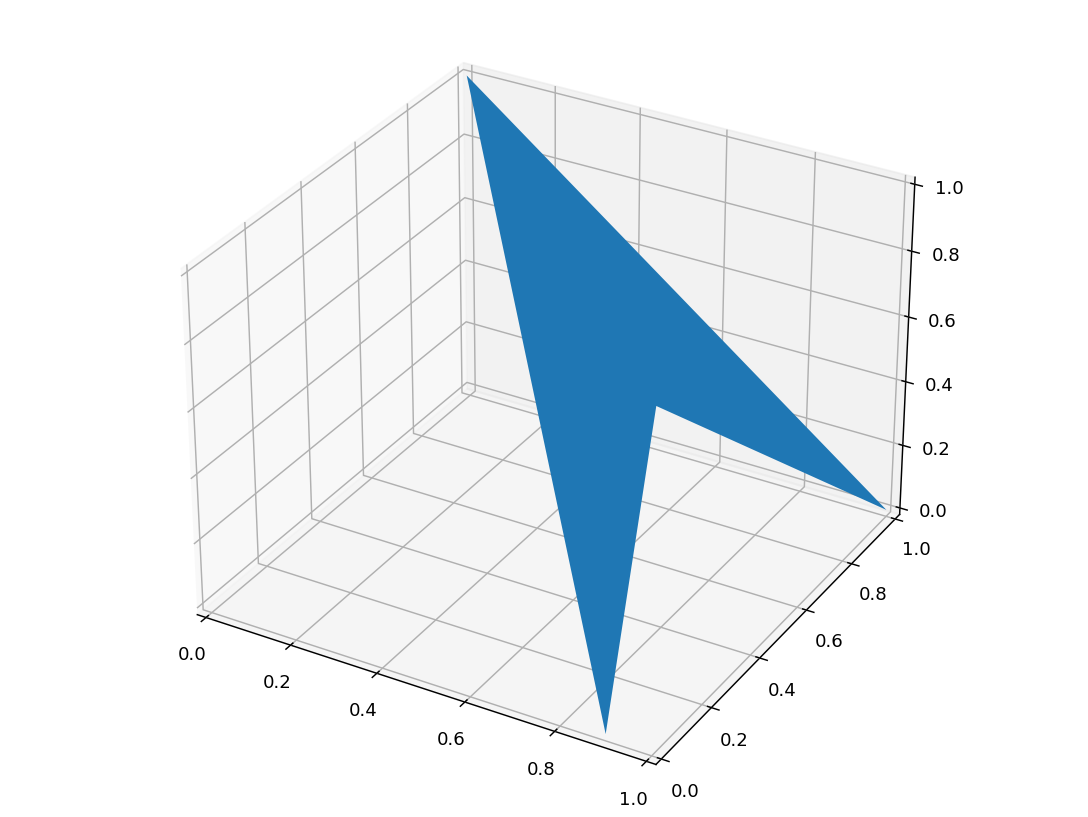

<ipython-input-136-6056bc7d7b77>:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [136]:
#just for fun
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
x = [0.9,1,1,0]
y = [0,0,1,1]
z = [0,1,0,1]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts))
plt.show()


In [179]:
print(rs.transform.TransformMethodsMixin.index(dsm, 145000.0, 247000.0)) # left top
print(rs.transform.TransformMethodsMixin.index(dsm, 145000.0, 238000.0)) # left bottom
print(rs.transform.TransformMethodsMixin.index(dsm, 162000.0, 247000.0)) # right top
print(rs.transform.TransformMethodsMixin.index(dsm, 162000.0, 238000.0)) # right bottom
print('\n')
print(rs.transform.TransformMethodsMixin.index(dsm, 150000.0, 244000.0))

ind_row, ind_col = rs.transform.TransformMethodsMixin.index(dsm, x_coord, y_coord)

min_indx_row,min_indx_col = rs.transform.TransformMethodsMixin.index(dsm, min_x, min_y)
max_indx_row,max_indx_col = rs.transform.TransformMethodsMixin.index(dsm, max_x, max_y)

print(f"{min_indx_row},{min_indx_col},{max_indx_row},{max_indx_col}")
abs(min_indx_row - max_indx_row)
abs(max_indx_col - min_indx_col)

(0, 0)
(9000, 0)
(0, 17000)
(9000, 17000)


(3000, 5000)
7075,14338,7058,14362


24

In [180]:
print(rs.transform.TransformMethodsMixin.index(dsm, 145000.0, 247000.0)) # left top
print(rs.transform.TransformMethodsMixin.index(dsm, 145000.0, 238000.0)) # left bottom
print(rs.transform.TransformMethodsMixin.index(dsm, 162000.0, 247000.0)) # right top
print(rs.transform.TransformMethodsMixin.index(dsm, 162000.0, 238000.0)) # right bottom
print('\n')
print(rs.transform.TransformMethodsMixin.index(dsm, 150000.0, 244000.0))

ind_row, ind_col = rs.transform.TransformMethodsMixin.index(dsm, x_coord, y_coord)
print(ind_row,ind_col)

(0, 0)
(9000, 0)
(0, 17000)
(9000, 17000)


(3000, 5000)
7066 14351


In [196]:
channel_slice = channel[ind_row - abs(max_indx_row - min_indx_row) :ind_row+abs(max_indx_row - min_indx_row),ind_col-abs(max_indx_col - min_indx_col):ind_col+abs(max_indx_col - min_indx_col)]
channel_slice.shape
type(channel)

numpy.ndarray

In [190]:
nx = channel_slice.shape[0]
ny = channel_slice.shape[1]
nx
nx

34

<IPython.core.display.Javascript object>


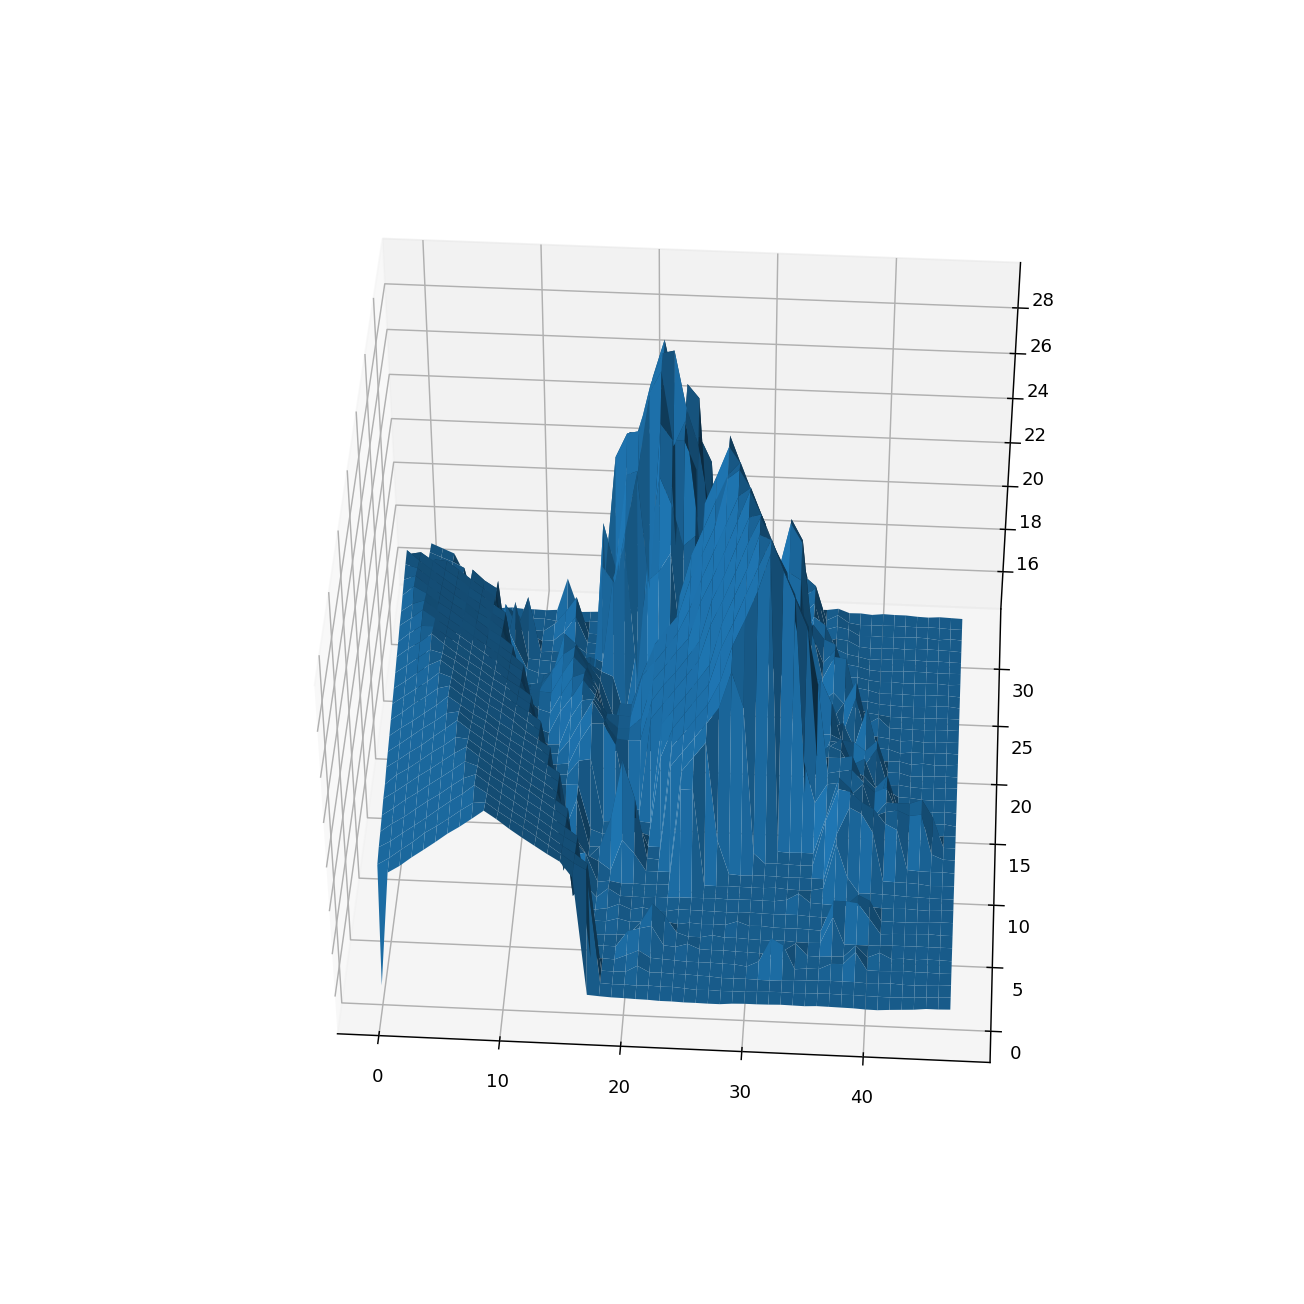

In [191]:
import matplotlib.pyplot as plt
nx = channel_slice.shape[1]
ny = channel_slice.shape[0]

x = range(nx)
y = range(ny)


X,Y = np.meshgrid(x,y)
hf = plt.figure(figsize=(10,10))
ha = hf.add_subplot(111,projection = '3d')

ha.plot_surface(X,Y,channel_slice)

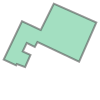

In [219]:
shape_poly = Polygon(get_polygon())
shape_poly

In [216]:
import matplotlib.pyplot as plt

coord = get_polygon()


xs, ys = zip(*coord) #create lists of x and y values
plt.figure()
plt.plot(xs,ys) 
plt.show() # if you need..

<IPython.core.display.Javascript object>

In [220]:
with rs.open("GeoTIFF/DHMVIIDSMRAS1m_k01.tif") as src:
    out_DSM_img,out_transform  = mask(dataset=src,shapes=[shape_poly],crop=True)
    out_meta_dsm = src.meta
    

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 17000,
 'height': 9000,
 'count': 1,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(1.0, 0.0, 145000.0,
        0.0, -1.0, 247000.0)}